# Project 1

Coordinate conversion from Geodetic to ECEF (Earth-Centered Earth-Fixed) coordinates and some calculations for a Triangle

## Tasks

For a given (user input) three point coordinates in geodetic coordinates (latitude, longitude and height):
- Convert to ECEF coordinate system
- Check if a triangle can be formed by those points

In case a triangle can be formed:
- Display the angles of the triangle, area, an radius of minimum enclosing circle
- Draw the triangle and the circle using any plotting library (e.g., matplotlib)


Example input coordinates: 
- (48.8562, 2.3508, 0.0674)
- (50.2044, 3.1230, 0.6792)
- (49.8915, 3.6198, 1.0166)

Converted coordinates using WGS84 in kilometers: 
- (4201, 172.46, 4780.10)
- (4084.78, 222.87, 4877.89)
- (4109.54, 259.98, 4855.80)

You can omit the z dimension and work in xy plane. 
- The center of the enclosing circle is (4147.35, 207.94) with a radius of 64.32. 
- The area of the triangle is 2780.16. 
- Angles 79.97, 79.74 and 20.29 degrees.


## References
- https://en.wikipedia.org/wiki/ECEF
- https://en.wikipedia.org/wiki/Geographic_coordinate_conversion#From_geodetic_to_ECEF_coordinates
- https://en.wikipedia.org/wiki/World_Geodetic_System 
- https://matplotlib.org/ 
- https://wiki.python.org/moin/NumericAndScientific/Plotting

In [0]:
# import all libraries
import math
import matplotlib.pyplot as plt


In [0]:
class Point3D:
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z

class Point2D:
  def __init__(self, x, y):
    self.x = x
    self.y = y

# y = ax + b
class Line2D:
  def __init__(self, a, b):
    self.a = a
    self.b = b

In [0]:
# Convert to ECEF coordinate system (in 3-dimentions)
def geodetic_2_ecef(lat, lon, height):
  a = 6378.137
  b = 6356.752314245
  f = 298.257223563
  e_sq = 1 - ((b*b) / (a*a))

  phi  = math.radians(lat)
  lamb = math.radians(lon)

  sin_lambda = math.sin(lamb)
  cos_lambda = math.cos(lamb)
  sin_phi = math.sin(phi)
  cos_phi = math.cos(phi)
  
  N = a / math.sqrt(1 - (e_sq * sin_phi * sin_phi))

  x = (N + height) * cos_phi * cos_lambda
  y = (N + height) * cos_phi * sin_lambda
  z = ((((b*b) / (a*a)) * N) + height) * sin_phi

  return Point3D(x, y, z)

In [0]:
# In 2-dimentions
def distance(p1, p2):
  return math.sqrt( (p1.x - p2.x)*(p1.x - p2.x) + (p1.y - p2.y)*(p1.y - p2.y) )

# Check if a triangle can be formed by those points
def is_triangle(p_a, p_b, p_c):
  d_ab = distance(p_a, p_b)
  d_ac = distance(p_a, p_c)
  d_bc = distance(p_b, p_c)

  return (d_ab + d_ac != d_bc) and (d_ab + d_bc != d_ac) and (d_ac + d_bc != d_ab)

def create_line(p1, p2):
  # line function is: y = ax + b
  # a = (y1-y2) / (x1-x2)
  # b = y1 - ax1
  a = (p1.y-p2.y) / (p1.x-p2.x)
  b = p1.y - (a*p1.x)

  return Line2D(a, b)

def find_common_point(l1, l2):
  # y = a1.x + b1
  # y = a2.x + b2

  # x0 = (b2-b1) / (a1-a2)
  # y0 = a1.x0 + b1
  x0 = (l2.b-l1.b) / (l1.a-l2.a)
  y0 = l1.a*x0 + l1.b

  return Point2D(x0, y0)

def find_mid_perpendicular(p1, p2):
  # l1: y = ax + b
  # l2: y = (-1/a)x + b'
  # a' = (-1/a)
  # b' = y0 + x0/a
  l1 = create_line(p1, p2)

  x_mid_point = (p1.x + p2.x) / 2
  y_mid_point = (p1.y + p2.y) / 2
  mid_point = Point2D(x_mid_point, y_mid_point)

  a2 = -1/l1.a
  b2 = mid_point.y + mid_point.x/l1.a

  return Line2D(a2, b2)

In [0]:
# Display the angles of the triangle, area, an radius of minimum enclosing circle
def get_center_of_enclosing_circle(p1, p2, p3):
  l1 = find_mid_perpendicular(p1, p2)
  l2 = find_mid_perpendicular(p1, p3)

  circle_point = find_common_point(l1, l2)

  return circle_point

def get_angles_radians(p1, p2, p3):
  c = distance(p1, p2)
  b = distance(p1, p3)
  a = distance(p2, p3)

  A = math.acos( ((b*b) + (c*c) - (a*a)) / (2*b*c) )
  B = math.acos( ((a*a) + (c*c) - (b*b)) / (2*a*c) )
  C = math.acos( ((a*a) + (b*b) - (c*c)) / (2*a*b) )

  return (A, B, C)

def get_angles_degrees(p1, p2, p3):
  (A, B, C) = get_angles_radians(p1, p2, p3)

  return (math.degrees(A), math.degrees(B), math.degrees(C))

def get_area(p1, p2, p3):
  (A, B, C) = get_angles_radians(p1, p2, p3)
  c = distance(p1, p2)
  b = distance(p1, p3)
  a = distance(p2, p3)
  s = (1/2) * (a*b) * math.sin(C)

  return s

def get_radius(p1, p2, p3):
  p_circle = get_center_of_enclosing_circle(p1, p2, p3)
  r = distance(p1, p_circle)

  return r

In [12]:
# Test
def are_close(a, b):
  margin = 1
  if (abs(a-b) >= margin):
    print("expected: ", a)
    print("reality: ", b)
  return abs(a-b) < margin


p1 = geodetic_2_ecef(48.8562, 2.3508, 0.0674)
assert are_close(4201, p1.x)
assert are_close(172.46, p1.y)
assert are_close(4780.10, p1.z)

p2 = geodetic_2_ecef(50.2044, 3.1230, 0.6792)
assert are_close(4084.78, p2.x)
assert are_close(222.87, p2.y)
assert are_close(4877.89, p2.z)

p3 = geodetic_2_ecef(49.8915, 3.6198, 1.0166)
assert are_close(4109.54, p3.x)
assert are_close(259.98, p3.y)
assert are_close(4855.80, p3.z)

pc = get_center_of_enclosing_circle(p1, p2, p3)
assert are_close(4147.35, pc.x)
assert are_close(207.94, pc.y)

r = get_radius(p1, p2, p3)
assert are_close(64.32, r)

(A, B, C) = get_angles_degrees(p1, p2, p3)
tmp = [A, B, C]
tmp.sort()
assert are_close(79.97, tmp[2])
assert are_close(79.74, tmp[1])
assert are_close(20.29, tmp[0])

s = get_area(p1, p2, p3)
assert are_close(2780.16, s)

print("All test are passed! 🎉")

All test are passed! 🎉


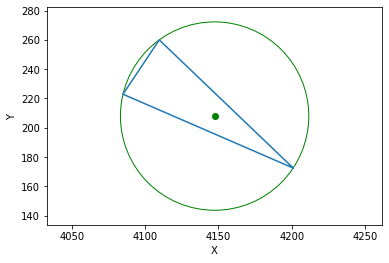

In [13]:
# Draw the triangle and the circle using any plotting library (e.g., matplotlib)
def draw(p1, p2, p3, pc, r):
  plt.ylabel('Y')
  plt.xlabel('X')
  plt.axis('equal')

  margin = r + 50
  plt.xlim(pc.x - margin, pc.x + margin)
  plt.ylim(pc.y - margin, pc.y + margin)

  # Draw triangle
  plt.plot([p1.x, p2.x, p3.x, p1.x], [p1.y, p2.y, p3.y, p1.y])
  plt.scatter([pc.x], [pc.y], color='g')

  # Draw circle
  ax = plt.gca()
  circle = plt.Circle((pc.x, pc.y), r, color='g', fill=False)
  ax.add_artist(circle)

  plt.show()


draw(p1, p2, p3, pc, r)